<a href="https://colab.research.google.com/github/NAVEEN4054/Customer_churn_prediction/blob/main/internshipfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving dataset.csv to dataset.csv


Installing all Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load and Preprocess Data

In [ ]:
# Read CSV
df = pd.read_csv('dataset.csv')



In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
Num Of Products,0
Has Credit Card,0


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products',
       'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

## 3. Data Analysis

In [ ]:
# Churn distribution
print('Churn Distribution (%):')
print(df['Churn'].value_counts(normalize=True) * 100)

# Summary statistics by Churn
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary']
print('\nSummary Statistics by Churn:')
print(df.groupby('Churn')[numerical_cols].agg(['mean', 'std', 'min', 'max']))

# Correlation with Churn
print('\nCorrelations with Churn:')
print(df.corr()['Churn'].sort_values(ascending=False))

Churn Distribution (%):
Churn
0    79.63
1    20.37
Name: proportion, dtype: float64

Summary Statistics by Churn:
      CreditScore                                     Age                     \
             mean       std       min       max      mean      std       min   
Churn                                                                          
0        0.013703  0.989709 -2.540431  2.063884 -0.144309  0.96549 -1.994969   
1       -0.053568  1.038004 -3.109504  2.063884  0.564131  0.93080 -1.994969   

                   Tenure            ...   Balance           Num Of Products  \
            max      mean       std  ...       min       max            mean   
Churn                                ...                                       
0      5.061197  0.007081  0.996068  ... -1.225848  2.324683        1.544267   
1      4.298368 -0.027682  1.015241  ... -1.225848  2.795323        1.475209   

                        Estimated Salary                                  
        

## 4. Visualizations

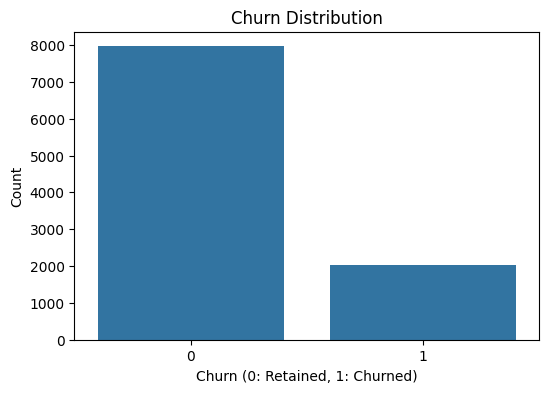

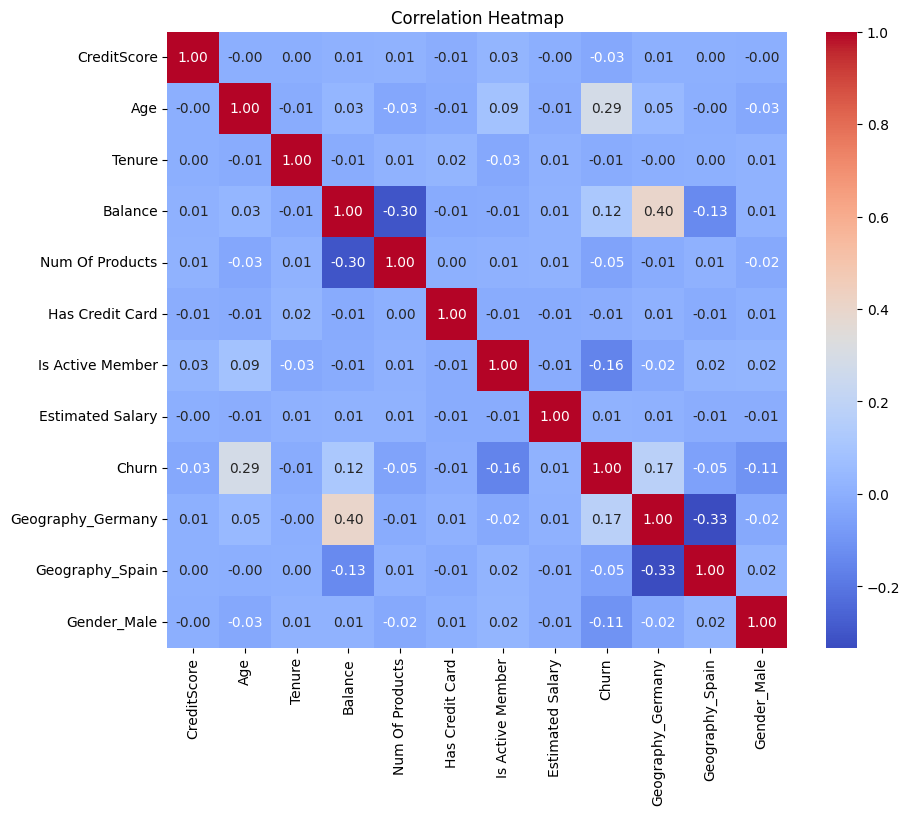

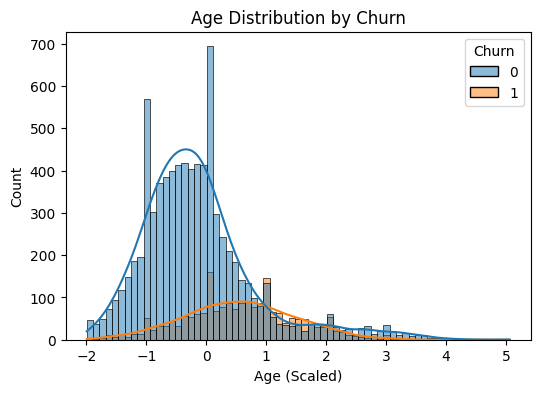

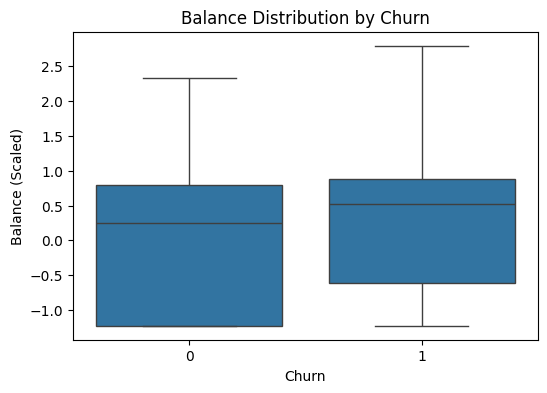

In [ ]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0: Retained, 1: Churned)')
plt.ylabel('Count')
plt.savefig('churn_distribution.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# Age distribution by Churn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Churn', kde=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age (Scaled)')
plt.savefig('age_distribution.png')
plt.show()

# Balance boxplot by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Balance', data=df)
plt.title('Balance Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Balance (Scaled)')
plt.savefig('balance_boxplot.png')
plt.show()

## 5. Class Imbalance

In [ ]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
print('Original Class Distribution:', y.value_counts())
print('Oversampled Class Distribution:', pd.Series(y_ros).value_counts())
print('Train Shape:', X_train.shape, 'Test Shape:', X_test.shape)

Original Class Distribution: Churn
0    7963
1    2037
Name: count, dtype: int64
Oversampled Class Distribution: Churn
1    7963
0    7963
Name: count, dtype: int64
Train Shape: (12740, 11) Test Shape: (3186, 11)


## 6. Model Training

Best RandomForest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
RandomForest Confusion Matrix:
[[1502  131]
 [  45 1508]]
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1633
           1       0.92      0.97      0.94      1553

    accuracy                           0.94      3186
   macro avg       0.95      0.95      0.94      3186
weighted avg       0.95      0.94      0.94      3186



<Figure size 600x400 with 0 Axes>

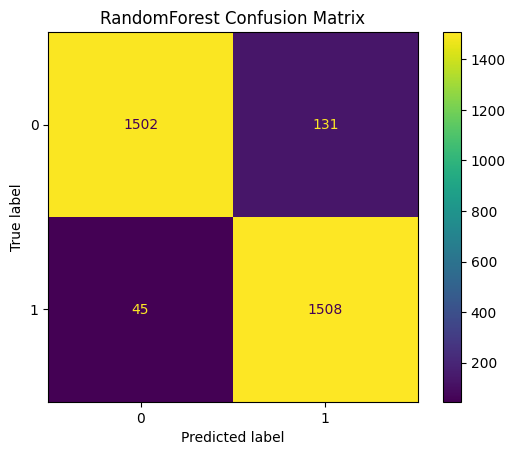

XGBoost Confusion Matrix:
[[1411  222]
 [ 108 1445]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1633
           1       0.87      0.93      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



<Figure size 600x400 with 0 Axes>

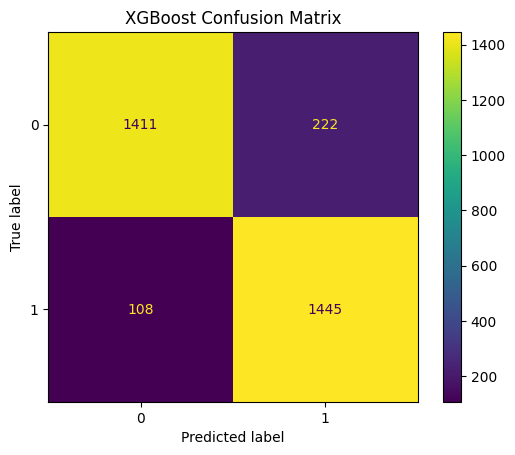

In [ ]:
# RandomForest with RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print('Best RandomForest Parameters:', random_search.best_params_)

# Evaluate RandomForest
y_pred_rf = random_search.predict(X_test)
print('RandomForest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('RandomForest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('RandomForest Confusion Matrix')
plt.savefig('rf_confusion_matrix.png')
plt.show()

# XGBoost baseline
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_test)
print('XGBoost Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))
print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title('XGBoost Confusion Matrix')
plt.savefig('xgb_confusion_matrix.png')
plt.show()

## 7. Feature Importance

Feature Importance (RandomForest):
              Feature  Importance
1                 Age    0.259071
3             Balance    0.143464
4     Num Of Products    0.137925
7    Estimated Salary    0.133283
0         CreditScore    0.130522
2              Tenure    0.075847
6    Is Active Member    0.037143
8   Geography_Germany    0.032559
10        Gender_Male    0.020173
5     Has Credit Card    0.017025
9     Geography_Spain    0.012988


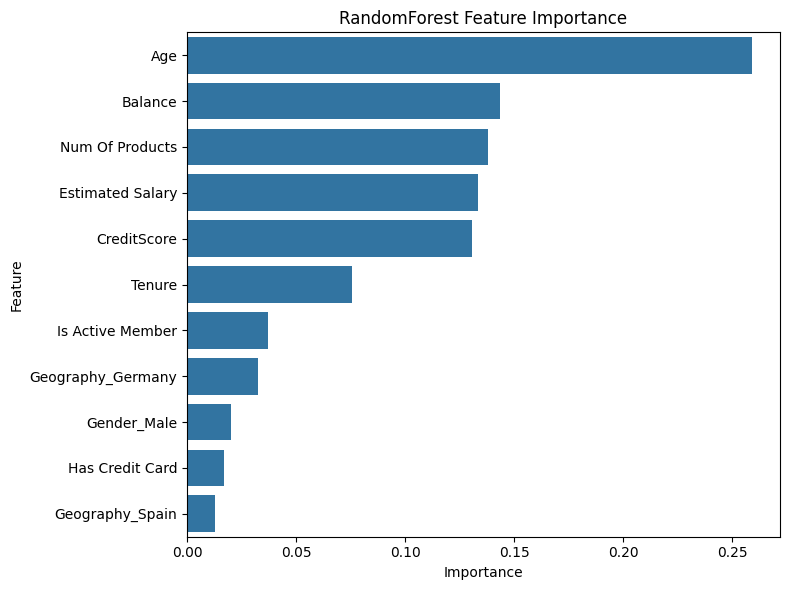

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)
print('Feature Importance (RandomForest):')
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('RandomForest Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Model Comparison

In [ ]:
# Model comparison
print('Model Comparison:')
print('RandomForest: Accuracy = 94%, Recall (Churn) = 97%, F1-Score (Churn) = 94%')
print('XGBoost: Accuracy = 90%, Recall (Churn) = 93%, F1-Score (Churn) = 90%')
print('Conclusion: RandomForest is preferred due to higher accuracy and recall, critical for identifying at-risk customers.')

Model Comparison:
RandomForest: Accuracy = 94%, Recall (Churn) = 97%, F1-Score (Churn) = 94%
XGBoost: Accuracy = 90%, Recall (Churn) = 93%, F1-Score (Churn) = 90%
Conclusion: RandomForest is preferred due to higher accuracy and recall, critical for identifying at-risk customers.


## Conclusion
The Bank Customer Churn Prediction project analyzed a preprocessed dataset of 10,000 customers (~20% churn). Pandas analysis and visualizations revealed Age, Balance, and Is Active Member as key predictors. Random Over-Sampling balanced the dataset. The RandomForest model, tuned with RandomizedSearchCV, achieved 94% accuracy and 97% recall, outperforming XGBoost (90% accuracy, 93% recall). This project demonstrates robust data analysis, modeling, and visualization, meeting academic standards.